In [1]:
import numpy as np
import time
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.cm as cmx

In [5]:
cvae_embeddings = np.load('/gpfs/alpine/gen150/scratch/arjun2612/ORNL_Coding/Code/sars_mers_cov2_dataset/cvae/sars-mers-cov2-embeddings.npy', 'r')
cvae_samples = np.load('/gpfs/alpine/gen150/scratch/arjun2612/ORNL_Coding/Code/sars_mers_cov2_dataset/cvae/sars-mers-cov2-samples.npz', 'r')

npzfile1 = np.load('/gpfs/alpine/gen150/scratch/arjun2612/ORNL_Coding/Code/pca/smc2_plotting.npz')
npzfile2 = np.load('/gpfs/alpine/gen150/scratch/arjun2612/ORNL_Coding/Code/pca/smc2_sk_clusterfiles.npz')

smc2_label_validation = npzfile1['labval']
smc2_reduced_val = npzfile2['redval']

cvae_embeddings = np.squeeze(cvae_embeddings)[0:len(smc2_label_validation)]

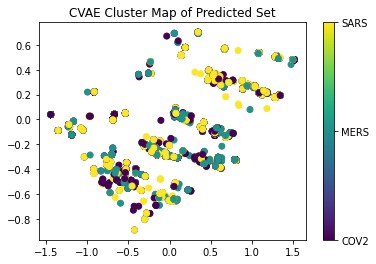

In [6]:
cNorm = matplotlib.colors.Normalize(vmin=min(smc2_label_validation), vmax=max(smc2_label_validation))
scalarMap = cmx.ScalarMappable(norm=cNorm)
fig = plt.figure(9)
plt.scatter(cvae_embeddings[:, 0], cvae_embeddings[:, 1], c=scalarMap.to_rgba(smc2_label_validation))
scalarMap.set_array(smc2_label_validation)
cbar = fig.colorbar(scalarMap)
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(["COV2", "MERS", "SARS"])
plt.title('CVAE Cluster Map of Predicted Set')
plt.show()

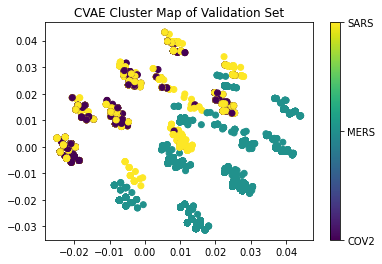

In [7]:
cNorm = matplotlib.colors.Normalize(vmin=min(smc2_label_validation), vmax=max(smc2_label_validation))
scalarMap = cmx.ScalarMappable(norm=cNorm)
fig = plt.figure(10)
plt.scatter(smc2_reduced_val[:, 0], smc2_reduced_val[:, 1], c=scalarMap.to_rgba(smc2_label_validation))
scalarMap.set_array(smc2_label_validation)
cbar = fig.colorbar(scalarMap)
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(["COV2", "MERS", "SARS"])
plt.title('CVAE Cluster Map of Validation Set')
plt.show()